# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name=r'C:\Users\anupa\gym\deep-reinforcement-learning\p2_continuous-control\Reacher_Windows_x86_64\Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Train!

In [5]:
import numpy as np
import random
import copy
from collections import namedtuple, deque
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from ddpg_model import Actor, Critic
from ddpg_agent import Agent
%matplotlib inline

In [6]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=10)


When finished, you can close the environment.

In [7]:
def ddpg(n_episodes=1000, max_t=10000):
    """DDQN Algorithm.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        print_every (int): frequency of printing information throughout iteration """
    
    scores = []
    scores_deque = deque(maxlen=100)
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
       # agent = Agent()
        agent.reset()
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        
        for t in range(max_t):
            action = agent.act(state)          # select an action
       
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done) # take step with agent (including learning)
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        
        scores_deque.append(score)       # save most recent score
        scores.append(score)             # save most recent score

        print('\rEpisode {}\tScore: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, score, np.mean(scores_deque)))
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} Episodes \tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
            
    return scores

In [8]:
scores = ddpg(n_episodes = 500)


Episode 1	Score: 0.61	Average Score: 0.61
Episode 1	Average Score: 0.61
Episode 2	Score: 0.47	Average Score: 0.54
Episode 2	Average Score: 0.54
Episode 3	Score: 0.33	Average Score: 0.47
Episode 3	Average Score: 0.47
Episode 4	Score: 1.03	Average Score: 0.61
Episode 4	Average Score: 0.61
Episode 5	Score: 0.39	Average Score: 0.57
Episode 5	Average Score: 0.57
Episode 6	Score: 0.10	Average Score: 0.49
Episode 6	Average Score: 0.49
Episode 7	Score: 1.51	Average Score: 0.63
Episode 7	Average Score: 0.63
Episode 8	Score: 0.60	Average Score: 0.63
Episode 8	Average Score: 0.63
Episode 9	Score: 1.14	Average Score: 0.69
Episode 9	Average Score: 0.69
Episode 10	Score: 0.74	Average Score: 0.69
Episode 10	Average Score: 0.69
Episode 11	Score: 0.49	Average Score: 0.67
Episode 11	Average Score: 0.67
Episode 12	Score: 0.16	Average Score: 0.63
Episode 12	Average Score: 0.63
Episode 13	Score: 1.23	Average Score: 0.68
Episode 13	Average Score: 0.68
Episode 14	Score: 1.33	Average Score: 0.72
Episode 14	Av

Episode 112	Score: 13.64	Average Score: 6.08
Episode 112	Average Score: 6.08
Episode 113	Score: 17.18	Average Score: 6.24
Episode 113	Average Score: 6.24
Episode 114	Score: 19.96	Average Score: 6.43
Episode 114	Average Score: 6.43
Episode 115	Score: 20.70	Average Score: 6.63
Episode 115	Average Score: 6.63
Episode 116	Score: 16.50	Average Score: 6.78
Episode 116	Average Score: 6.78
Episode 117	Score: 16.11	Average Score: 6.93
Episode 117	Average Score: 6.93
Episode 118	Score: 12.33	Average Score: 7.03
Episode 118	Average Score: 7.03
Episode 119	Score: 15.79	Average Score: 7.17
Episode 119	Average Score: 7.17
Episode 120	Score: 23.62	Average Score: 7.40
Episode 120	Average Score: 7.40
Episode 121	Score: 14.96	Average Score: 7.53
Episode 121	Average Score: 7.53
Episode 122	Score: 25.45	Average Score: 7.77
Episode 122	Average Score: 7.77
Episode 123	Score: 15.54	Average Score: 7.90
Episode 123	Average Score: 7.90
Episode 124	Score: 18.85	Average Score: 8.07
Episode 124	Average Score: 8.07

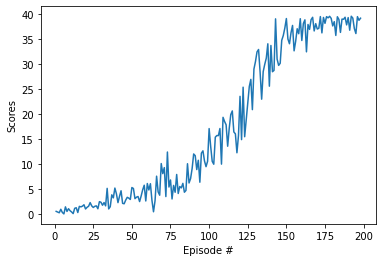

In [10]:

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Scores')
plt.xlabel('Episode #')
plt.show()

In [9]:
env.close()